In [1]:
import math
from scipy.stats import norm
import numpy as np

def black_scholes(S, K, T, r, sigma, option_type="call"):
    """
    Black-Scholes option pricing formula.

    Parameters:
    S : float : Current stock price
    K : float : Strike price
    T : float : Time to maturity (in years)
    r : float : Risk-free interest rate (annualized)
    sigma : float : Volatility of the stock (annualized)
    option_type : str : "call" for call option, "put" for put option

    Returns:
    float : Option price
    """
    d1 = (math.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * math.sqrt(T))
    d2 = d1 - sigma * math.sqrt(T)

    if option_type.lower() == "call":
        price = S * norm.cdf(d1) - K * math.exp(-r * T) * norm.cdf(d2)
    elif option_type.lower() == "put":
        price = K * math.exp(-r * T) * norm.cdf(-d2) - S * norm.cdf(-d1)
    else:
        raise ValueError("Invalid option type. Use 'call' or 'put'.")

    return price

def option_greeks(S, K, T, r, sigma, option_type="call"):
    """
    Calculate the Greeks of an option using the Black-Scholes model.

    Parameters:
    S : float : Current stock price
    K : float : Strike price
    T : float : Time to maturity (in years)
    r : float : Risk-free interest rate (annualized)
    sigma : float : Volatility of the stock (annualized)
    option_type : str : "call" for call option, "put" for put option

    Returns:
    dict : A dictionary containing the Greeks (Delta, Gamma, Theta, Vega, Rho)
    """
    d1 = (math.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * math.sqrt(T))
    d2 = d1 - sigma * math.sqrt(T)

    delta = norm.cdf(d1) if option_type.lower() == "call" else norm.cdf(d1) - 1
    gamma = norm.pdf(d1) / (S * sigma * math.sqrt(T))
    theta = (-S * norm.pdf(d1) * sigma / (2 * math.sqrt(T)) -
                r * K * math.exp(-r * T) * norm.cdf(d2 if option_type.lower() == "call" else -d2))
    vega = S * norm.pdf(d1) * math.sqrt(T)
    rho = (K * T * math.exp(-r * T) * norm.cdf(d2) if option_type.lower() == "call"
            else -K * T * math.exp(-r * T) * norm.cdf(-d2))

    return {
        "Delta": delta,
        "Gamma": gamma,
        "Theta": theta,
        "Vega": vega,
        "Rho": rho
    }

        

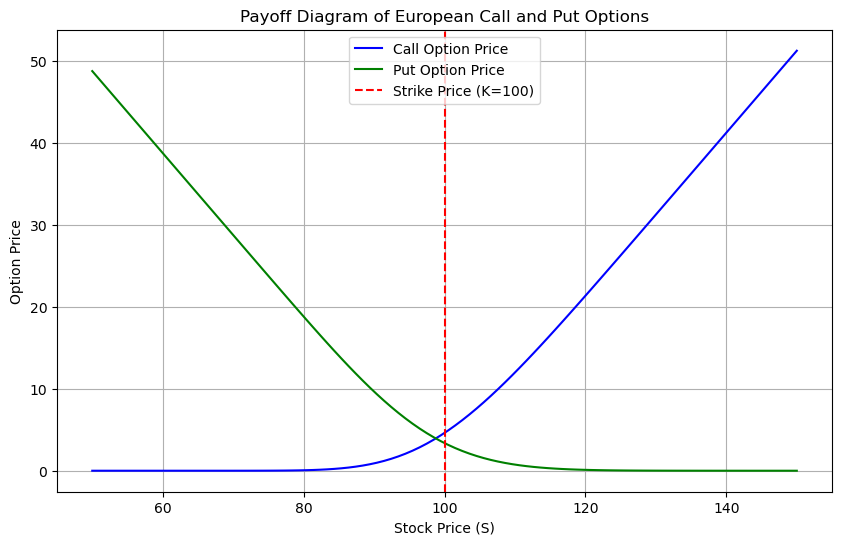

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Parameters
S = np.linspace(50, 150, 100)  # Range of stock prices
K = 100  # Strike price
T = 0.25  # Time to maturity
r = 0.05  # Risk-free rate
sigma = 0.2  # Volatility

# Calculate option prices
call_prices = [black_scholes(s, K, T, r, sigma, option_type="call") for s in S]

put_prices = [black_scholes(s, K, T, r, sigma, option_type="put") for s in S]

# Plot payoff diagram
plt.figure(figsize=(10, 6))
plt.plot(S, call_prices, label="Call Option Price", color="blue")
plt.plot(S, put_prices, label="Put Option Price", color="green")
plt.axvline(K, color="red", linestyle="--", label="Strike Price (K=100)")
plt.title("Payoff Diagram of European Call and Put Options")
plt.xlabel("Stock Price (S)")
plt.ylabel("Option Price")
plt.legend()
plt.grid()
plt.show()


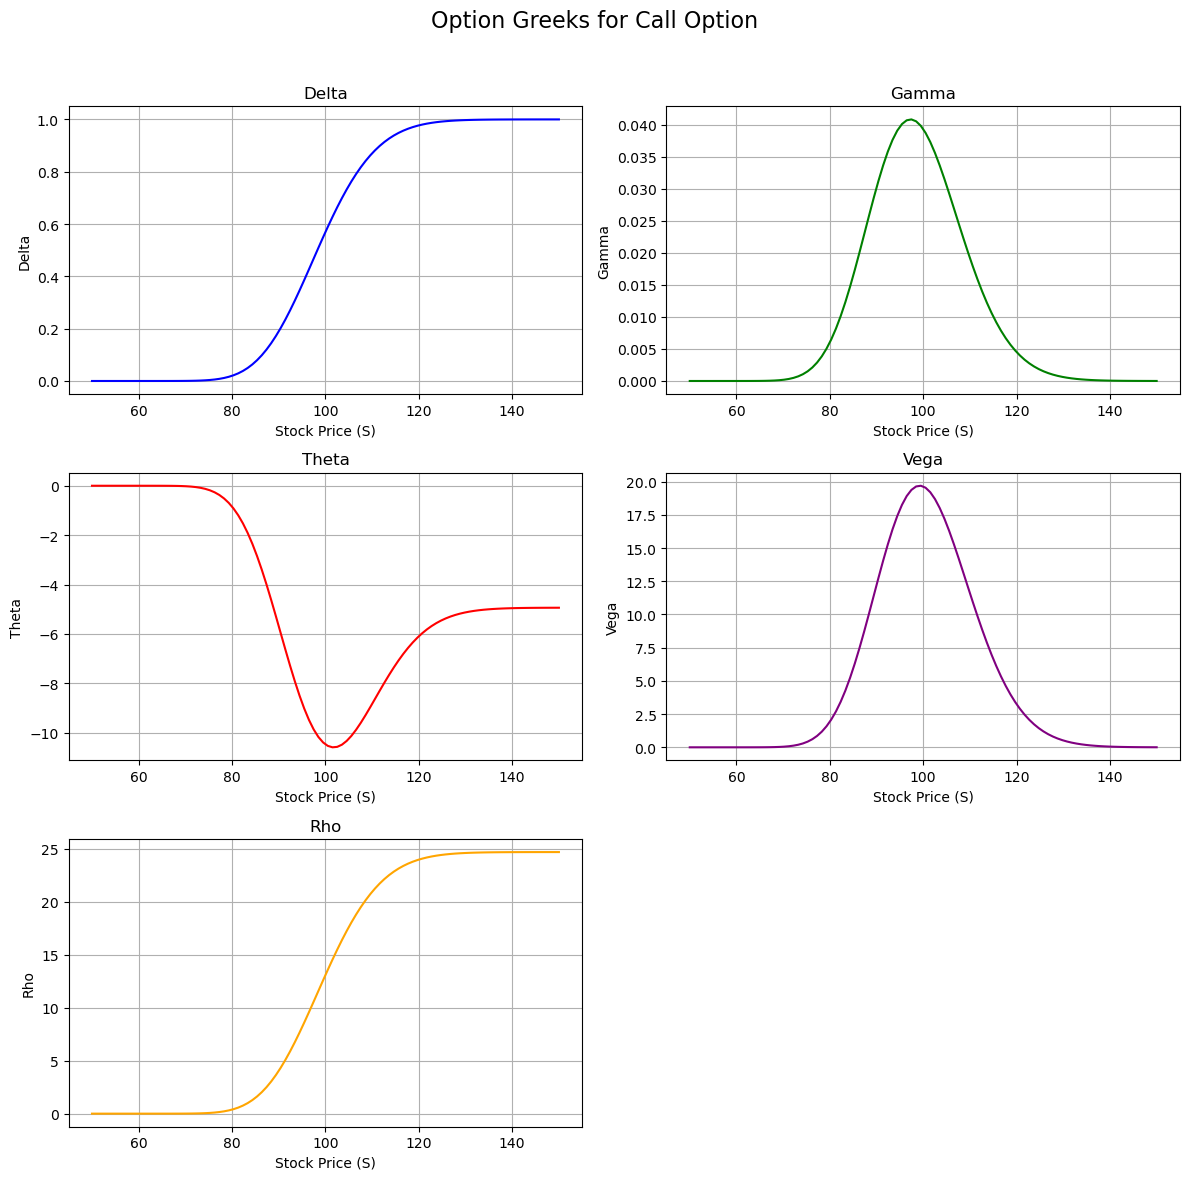

In [4]:

# Calculate Greeks for each stock price in S
greeks = [option_greeks(s, K, T, r, sigma, option_type="call") for s in S]

# Extract individual Greeks
delta = [g["Delta"] for g in greeks]
gamma = [g["Gamma"] for g in greeks]
theta = [g["Theta"] for g in greeks]
vega = [g["Vega"] for g in greeks]
rho = [g["Rho"] for g in greeks]

# Plot Greeks
fig, axs = plt.subplots(3, 2, figsize=(12, 12))
fig.suptitle("Option Greeks for Call Option", fontsize=16)

# Delta
axs[0, 0].plot(S, delta, label="Delta", color="blue")
axs[0, 0].set_title("Delta")
axs[0, 0].set_xlabel("Stock Price (S)")
axs[0, 0].set_ylabel("Delta")
axs[0, 0].grid()

# Gamma
axs[0, 1].plot(S, gamma, label="Gamma", color="green")
axs[0, 1].set_title("Gamma")
axs[0, 1].set_xlabel("Stock Price (S)")
axs[0, 1].set_ylabel("Gamma")
axs[0, 1].grid()

# Theta
axs[1, 0].plot(S, theta, label="Theta", color="red")
axs[1, 0].set_title("Theta")
axs[1, 0].set_xlabel("Stock Price (S)")
axs[1, 0].set_ylabel("Theta")
axs[1, 0].grid()

# Vega
axs[1, 1].plot(S, vega, label="Vega", color="purple")
axs[1, 1].set_title("Vega")
axs[1, 1].set_xlabel("Stock Price (S)")
axs[1, 1].set_ylabel("Vega")
axs[1, 1].grid()

# Rho
axs[2, 0].plot(S, rho, label="Rho", color="orange")
axs[2, 0].set_title("Rho")
axs[2, 0].set_xlabel("Stock Price (S)")
axs[2, 0].set_ylabel("Rho")
axs[2, 0].grid()

# Hide the empty subplot
axs[2, 1].axis("off")

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


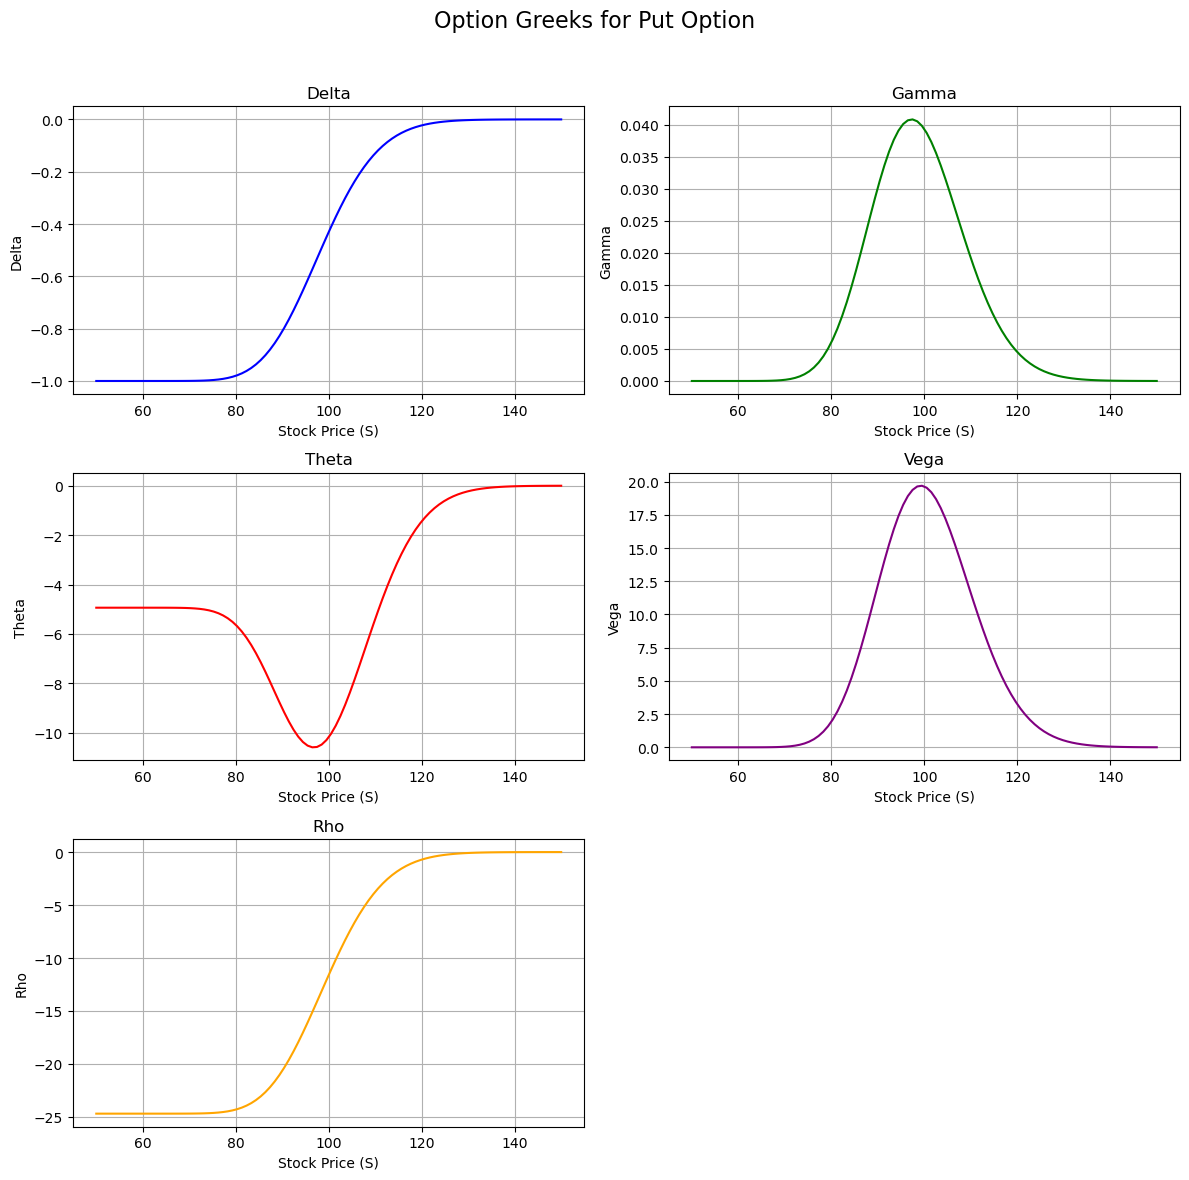

In [5]:
# Calculate Greeks for each stock price in S for put options
put_greeks = [option_greeks(s, K, T, r, sigma, option_type="put") for s in S]

# Extract individual Greeks for put options
put_delta = [g["Delta"] for g in put_greeks]
put_gamma = [g["Gamma"] for g in put_greeks]
put_theta = [g["Theta"] for g in put_greeks]
put_vega = [g["Vega"] for g in put_greeks]
put_rho = [g["Rho"] for g in put_greeks]

# Plot Greeks for put options
fig, axs = plt.subplots(3, 2, figsize=(12, 12))
fig.suptitle("Option Greeks for Put Option", fontsize=16)

# Delta
axs[0, 0].plot(S, put_delta, label="Delta", color="blue")
axs[0, 0].set_title("Delta")
axs[0, 0].set_xlabel("Stock Price (S)")
axs[0, 0].set_ylabel("Delta")
axs[0, 0].grid()

# Gamma
axs[0, 1].plot(S, put_gamma, label="Gamma", color="green")
axs[0, 1].set_title("Gamma")
axs[0, 1].set_xlabel("Stock Price (S)")
axs[0, 1].set_ylabel("Gamma")
axs[0, 1].grid()

# Theta
axs[1, 0].plot(S, put_theta, label="Theta", color="red")
axs[1, 0].set_title("Theta")
axs[1, 0].set_xlabel("Stock Price (S)")
axs[1, 0].set_ylabel("Theta")
axs[1, 0].grid()

# Vega
axs[1, 1].plot(S, put_vega, label="Vega", color="purple")
axs[1, 1].set_title("Vega")
axs[1, 1].set_xlabel("Stock Price (S)")
axs[1, 1].set_ylabel("Vega")
axs[1, 1].grid()

# Rho
axs[2, 0].plot(S, put_rho, label="Rho", color="orange")
axs[2, 0].set_title("Rho")
axs[2, 0].set_xlabel("Stock Price (S)")
axs[2, 0].set_ylabel("Rho")
axs[2, 0].grid()

# Hide the empty subplot
axs[2, 1].axis("off")

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

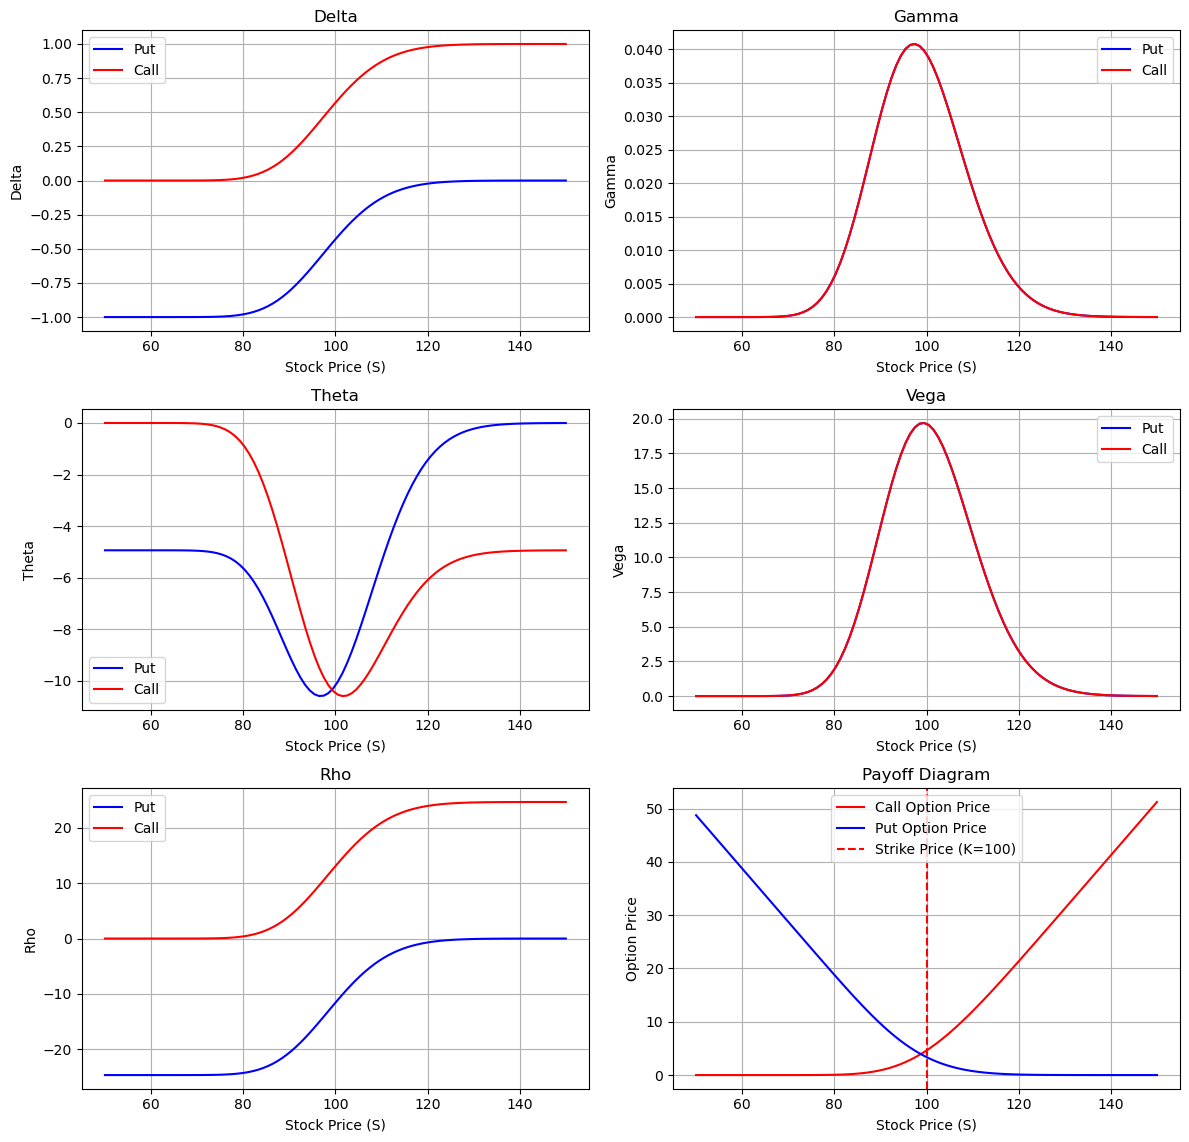

In [6]:
# Calculate Greeks for each stock price in S for call options
call_greeks = [option_greeks(s, K, T, r, sigma, option_type="call") for s in S]

# Extract individual Greeks for call options
call_delta = [g["Delta"] for g in call_greeks]
call_gamma = [g["Gamma"] for g in call_greeks]
call_theta = [g["Theta"] for g in call_greeks]
call_vega = [g["Vega"] for g in call_greeks]
call_rho = [g["Rho"] for g in call_greeks]

# Calculate Greeks for each stock price in S for put options
put_greeks = [option_greeks(s, K, T, r, sigma, option_type="put") for s in S]

# Extract individual Greeks for put options
put_delta = [g["Delta"] for g in put_greeks]
put_gamma = [g["Gamma"] for g in put_greeks]
put_theta = [g["Theta"] for g in put_greeks]
put_vega = [g["Vega"] for g in put_greeks]
put_rho = [g["Rho"] for g in put_greeks]

# Plot Greeks for put options
fig, axs = plt.subplots(3, 2, figsize=(12, 12))
# fig.suptitle("Option Greeks for Put Option", fontsize=16)

# Delta
axs[0, 0].plot(S, put_delta, label="Put", color="blue")
axs[0, 0].plot(S, call_delta, label="Call", color="red")
axs[0, 0].set_title("Delta")
axs[0, 0].set_xlabel("Stock Price (S)")
axs[0, 0].set_ylabel("Delta")
axs[0, 0].legend()
axs[0, 0].grid()

# Gamma
axs[0, 1].plot(S, put_gamma, label="Put", color="blue")
axs[0, 1].plot(S, call_gamma, label="Call", color="red")
axs[0, 1].set_title("Gamma")
axs[0, 1].set_xlabel("Stock Price (S)")
axs[0, 1].set_ylabel("Gamma")
axs[0, 1].legend()
axs[0, 1].grid()

# Theta
axs[1, 0].plot(S, put_theta, label="Put", color="blue")
axs[1, 0].plot(S, call_theta, label="Call", color="red")
axs[1, 0].set_title("Theta")
axs[1, 0].set_xlabel("Stock Price (S)")
axs[1, 0].set_ylabel("Theta")
axs[1, 0].legend()
axs[1, 0].grid()

# Vega
axs[1, 1].plot(S, put_vega, label="Put", color="blue")
axs[1, 1].plot(S, call_vega, label="Call", color="red")
axs[1, 1].set_title("Vega")
axs[1, 1].set_xlabel("Stock Price (S)")
axs[1, 1].set_ylabel("Vega")
axs[1, 1].legend()
axs[1, 1].grid()

# Rho
axs[2, 0].plot(S, put_rho, label="Put", color="blue")
axs[2, 0].plot(S, call_rho, label="Call", color="red")
axs[2, 0].set_title("Rho")
axs[2, 0].set_xlabel("Stock Price (S)")
axs[2, 0].set_ylabel("Rho")
axs[2, 0].legend()
axs[2, 0].grid()

# Hide the empty subplot
#axs[2, 1].axis("off")

# Calculate option prices
call_prices = [black_scholes(s, K, T, r, sigma, option_type="call") for s in S]

put_prices = [black_scholes(s, K, T, r, sigma, option_type="put") for s in S]

# Plot payoff diagram

axs[2, 1].plot(S, call_prices, label="Call Option Price", color="red")
axs[2, 1].plot(S, put_prices, label="Put Option Price", color="blue")
axs[2, 1].axvline(K, color="red", linestyle="--", label="Strike Price (K=100)")
axs[2, 1].set_title("Payoff Diagram")
axs[2, 1].set_xlabel("Stock Price (S)")
axs[2, 1].set_ylabel("Option Price")
axs[2, 1].legend()
axs[2, 1].grid()

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

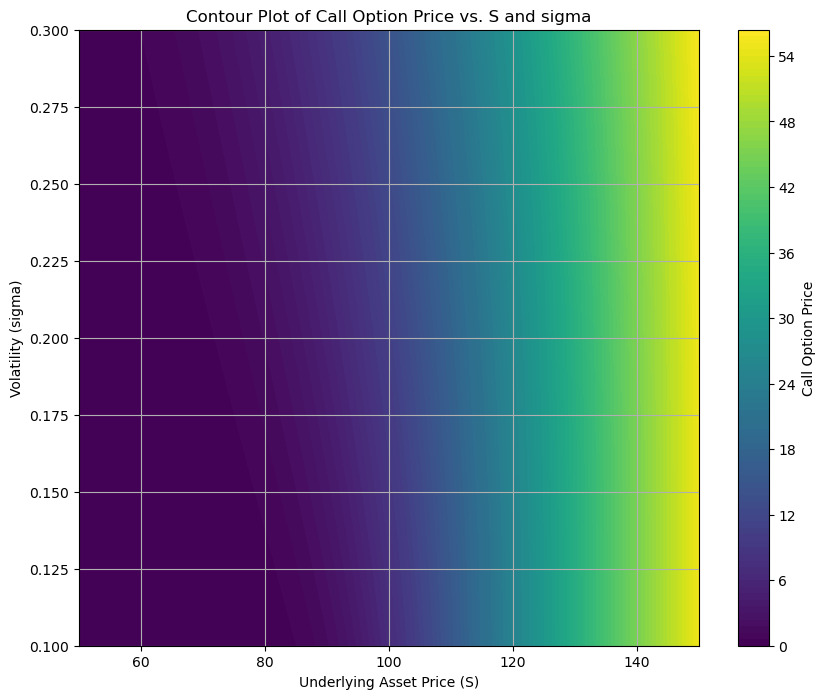

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def black_scholes_call(S, K, T, r, sigma):
    """Calculates the Black-Scholes call option price."""
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    N_d1 = 0.5 * (1 + erf(d1 / np.sqrt(2)))
    N_d2 = 0.5 * (1 + erf(d2 / np.sqrt(2)))
    call_price = S * N_d1 - K * np.exp(-r * T) * N_d2
    return call_price

# Parameters
K = 100  # Strike price
T = 1    # Time to expiration (in years)
r = 0.05 # Risk-free rate

# Create a grid of S and sigma values
S_values = np.linspace(50, 150, 500)
sigma_values = np.linspace(0.1, 0.3, 100)
S_grid, sigma_grid = np.meshgrid(S_values, sigma_values)

# Calculate call option prices for each combination of S and sigma

call_prices = np.array([[black_scholes(S, K, T, r, sigma) for S in S_row] for S_row, sigma in zip(S_grid, sigma_values)])

# Lm_grid = np.array([[max_drop(L0_fixed, k, m) for k in k_values] for m in m_values])

# Create the contour plot
plt.figure(figsize=(10, 8))
contour = plt.contourf(S_grid, sigma_grid, call_prices, levels=100, cmap='viridis')
plt.colorbar(contour, label='Call Option Price')
plt.xlabel('Underlying Asset Price (S)')
plt.ylabel('Volatility (sigma)')
plt.title('Contour Plot of Call Option Price vs. S and sigma')
plt.grid(True)
plt.show()
